# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# Klasyfikator kNN 


## Implementacja kNN od zera

Notatnik ten zawiera implementacją klasyfikatora kNN (k najbliższych sąsiadów z ang. k nearest neighbours).  W tej metodzie klasyfikowany obiekt przydzielamy do tej klasy, do której należy większość z jego `k` sąsiadów.


**1\. Generacja danych.**

Tym razem, zamiast wczytywać dane, wygeneruj je z wykorzystaniem funkcji [make_blobs](http://scikit-learn.org/0.16/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). 

Ustaw ilość próbek na `500`, a ilość grup (centrów) na `3`. Ponadto, aby twoje rysunki były identyczne jak przedstawione poniżej, ważne jest ustawienie `random_state=2`.


In [1]:
%matplotlib inline
import numpy as np 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.neighbors import NearestCentroid
import matplotlib.pyplot as plt

# metoda generujaca dane treningowe i testowe
from sklearn.datasets import make_blobs

blobs_data = None
blobs_target = None

# YOUR CODE HERE
blobs_data, blobs_target = make_blobs(n_samples=500, centers=3, random_state=2)
# blobs_target - gdzie obiekt z blobs_data powinien należeć
# centers - trzy grupy

In [2]:
assert blobs_data.shape == (500, 2)
assert blobs_data.shape[0] == blobs_target.shape[0]

**Wizualizacja wygenerowanych danych**

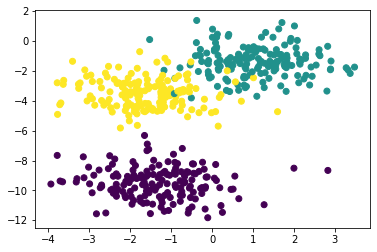

In [3]:
plt.scatter(blobs_data[:,0], blobs_data[:,1],c=blobs_target)

**2\. Normalizacja danych wejściowych**

Przed rozpoczęciem należy zapewnić bezpośrednią porównywalność cech, czyli dokonać normalizacji. Skorzystaj ze wzoru z [Definicji 2](http://books.icse.us.edu.pl/runestone/static/ai/IstotaUczeniaNadzorowanegoINienadzorowanego/ReprezentacjaWzorcow.html#przetwarzanie-wstepne) 
 

 

In [4]:
def normalize(v):
    return (v - np.mean(v, axis=0))/np.std(v, axis=0)

In [5]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
blobs_data_normalized = normalize(blobs_data)
np.testing.assert_array_almost_equal(blobs_data_normalized[100], np.array([0.39173587, 0.67031484]))

*Wykres po normalizacji*

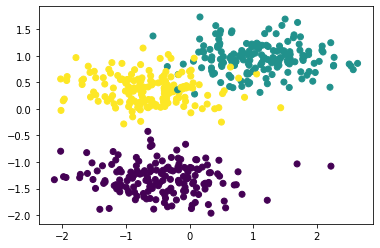

In [7]:
plt.scatter(blobs_data_normalized[:,0], blobs_data_normalized[:,1],c = np.ravel(blobs_target))

**3\. Podział na dane treningowe i testowe.**

W sposób losowy podziel wygenerowane dane na zbiór uczący i testowy w proporcji 70% do 30%. 

Wykorzystaj w tym celu narzędzie  `train_test_split` z `from sklearn.model_selection`.
Ustaw `random_state=123` (tylko w tym przypadku zadziałają automatyczne testy).

In [8]:
train, test, train_labels, test_labels = None, None, None, None

train, test, train_labels, test_labels = train_test_split(normalize(blobs_data), blobs_target, test_size=0.30, random_state=123)

In [9]:
assert train.shape[1] == 2
assert len(train.shape) == 2
assert len(train_labels.shape) == 1

assert np.shape(train)[0] == 0.7 * np.shape(blobs_data_normalized)[0]
assert np.shape(test)[0] == np.shape(blobs_data_normalized)[0] - np.shape(train)[0]

**4\. Odległość wektorów testowych danych treningowych**

Dla każdego wektora z danych testowych wyznacz odległość od wszystkich punktów treningowych.

In [10]:
# metryka euklidesowa 

def distances(x):
    array = np.sqrt(np.sum((x-train)**2, axis=1))
    return array

In [11]:
assert distances(test[0]).shape == (350,)
assert distances(test[0])[1]==1.3431124281080467

**5\. Znajdź `k` najbliższych sąsiadów**

Dla każdego wektora z danych testowych znajdź klasy `k` najbliższych danych treningowych. Wykorzystaj sortowanie.

In [12]:
def k_nearest_classes(x, k=1):
    dist = distances(x)
    if k == 1:
        return np.array[train_labels[np.argmin(dist)]]
    else:
        return train_labels[np.argsort(dist)[0:k]]
    #   return train_labels[np.argsort(dist, axis=None)[0:k]]

In [13]:
k = 3
np.testing.assert_array_equal( k_nearest_classes(test[0], k), [2,2,2])

**6\. Funkcja klasyfikująca**

W głosowaniu wsród najbliższych sąsiadów wyznacz klasę wektora testowego.

In [14]:
def classify(x, k=1):
    
    if len(x.shape) > 1:
        return np.array([np.bincount(k_nearest_classes(t, k)).argmax() for t in x])
    else:
        return np.bincount(k_nearest_classes(x, k)).argmax()

#     dist = [np.sqrt(np.sum((x[i]-train)**2, axis=1)) for i in range(test.shape[0])]
#     z = np.array([(train_labels[np.argmin(dist[i])]) for i in range(test.shape[0])])
#     return z

In [15]:
assert classify(test, k).shape == (150,)
assert classify(test, k)[100]==2
assert np.all( classify(test,3)[:5] ==  [2, 2, 0, 1, 0] )

**7\. Jaki jest procent poprawych odpowiedzi?**

In [16]:
Z = classify(test, k)
P = np.sum(test_labels == Z)
score = P/np.size(Z)

In [17]:
np.testing.assert_almost_equal(score, 0.98)

**8\. Stwórz klasę `kNNClassifier` analogiczną do klasy `sklearn.neighbors.KNeighborsClassifier`**

In [18]:
class kNNClassifier():
    def __init__(self, n_neighbors):
        self.k = n_neighbors

    #zapamietaj dane treningowe
    def fit(self, train, train_labels):
        self.train = train
        self.train_labels = train_labels

    #metoda wyznaczjaca odległości
    def distances(self, x):
        return np.sqrt(np.sum((x-self.train)**2, axis=1))

    #znajdź klasy k sąsiadów
    def kneighbors(self, x, k):
        dists = self.distances(x)
        if k == 1:
            return [self.train_labels[np.argmin(dists)]]
        return self.train_labels[np.argsort(dists)[:k]]

    #wyznacza klasę dla każdej danej testowej
    def predict(self, test):
        if len(test.shape) > 1:
            return np.array([np.bincount(self.kneighbors(t, self.k)).argmax() for t in test])
        return np.bincount(self.kneighbors(test, self.k)).argmax()

    #wyznacza dokładność klasyfikatora
    def score(self, test, test_labels):
        return np.sum(test_labels == self.predict(test))/len(self.predict(test))

In [19]:
clf = kNNClassifier(k)
clf.fit(train, train_labels)
clf.score(test, test_labels)
np.testing.assert_almost_equal(score, clf.score(test, test_labels))

**9\. Porównanie z klasyfikatorem `sklearn.neighbors.KNeighborsClassifier`**

In [20]:
from sklearn.neighbors import KNeighborsClassifier 

ncent = KNeighborsClassifier(k)
ncent.fit(train, train_labels)
np.testing.assert_array_almost_equal(ncent.predict(test),  clf.predict(test))
assert ncent.score(test, test_labels) == clf.score(test, test_labels)


In [21]:
h = .02
x_min, x_max = train[:, 0].min() - 1, train[:, 0].max() + 1
y_min, y_max = train[:, 1].min() - 1, train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

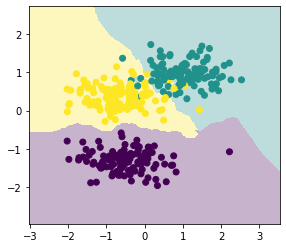

In [22]:
Z = Z.reshape(xx.shape)
plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.3)#,cmap='GnBu')
plt.scatter(train[:,0], train[:,1],c=np.ravel(train_labels))

**10\. Dane wczytane z pliku `.npz`**

Wczytaj dane testowe z pliku `banana.npz` za pomocą `np.load`. Plik ten zawiera dane i etykiety (ustal jak się do nich dobrać). 

Znormalizuj je i podziel je na dane treningowe i testowe w proporcji jak w pkt. 3. Przy dzieleniu ustaw `random_state=333`. 



In [23]:
import numpy as np

banana_data = None
banana_target = None
banana_data_normalized = None
train, test, train_labels, test_labels = None, None, None, None


from sklearn.model_selection import train_test_split

# YOUR CODE HERE
banana = np.load("banana.npz")
banana_data = banana['data']
banana_target = banana['labels']
banana_data_normalized = normalize(banana_data)
train, test, train_labels, test_labels = train_test_split(banana_data_normalized, banana_target, test_size=0.3, random_state=333)

**Wykres danych po normalizacji**

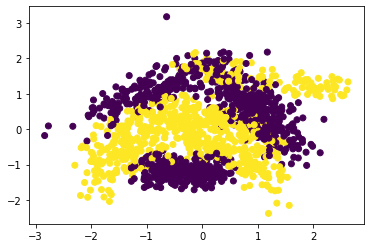

In [24]:
plt.scatter(banana_data_normalized[:,0], banana_data_normalized[:,1], c=banana_target)

**Dokładność klasyfikatora kNN dla powyższych danych**

In [25]:
k = 1
clf = kNNClassifier(k)
clf.fit(train, train_labels)
np.testing.assert_almost_equal(clf.score(test, test_labels),  0.8577, decimal=3)

In [26]:
clf.score(test, test_labels)

0.8577777777777778

## Własności kNN


Poeksperymentuj ! Narysuj obszar decyzyjny i zbadaj jak dokładność zależy od liczby sąsiadów.

In [27]:
k = 1
clf = KNeighborsClassifier(k)
clf.fit(train, train_labels)
h = .02
x_min, x_max = train[:, 0].min() - 1, train[:, 0].max() + 1
y_min, y_max = train[:, 1].min() - 1, train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

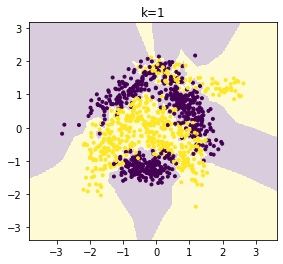

In [28]:
Z = Z.reshape(xx.shape)
plt.imshow(Z,extent=[x_min,x_max,y_min,y_max], origin='lower',alpha=0.2)
plt.title('k=%d'%k)
plt.scatter(train[:,0], train[:,1], c=train_labels, marker='.')

In [29]:
s = []
for k in range(1,110,3):
    clf = KNeighborsClassifier(k)
    clf.fit(train, train_labels) 
    s.append( (clf.score(test, test_labels) ,clf.score(train, train_labels)) ) 
s = np.array(s)

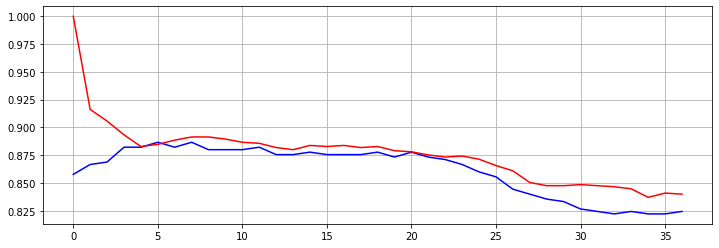

In [30]:
plt.figure(figsize=(12,4))
plt.grid(True)
plt.plot(s[:,0],'b-',s[:,1],'r-')